<a href="https://colab.research.google.com/github/zoybathecodess/AI_RES/blob/main/CO2XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone your GitHub repo
!git clone https://github.com/zoybathecodess/AI_RES.git

Cloning into 'AI_RES'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 48 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 557.68 KiB | 9.29 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd AI_RES
!mkdir data

/content/AI_RES/AI_RES


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_co2_dataset_with_datetime.csv to processed_co2_dataset_with_datetime.csv


In [ ]:
import os

for name in uploaded.keys():
    os.rename(name, f"data/{name}")

In [ ]:
!ls data

processed_co2_dataset_with_datetime.csv


In [ ]:

data ={.
 "train_csv_path":"data/processed_co2_dataset_with_datetime.csv" ,
 "datetime_col": "datetime",
      # or your actual datetime column
 "target_col":"CO2"  }   # replace with real column
print(data)

{'train_csv_path': 'data/processed_co2_dataset_with_datetime.csv', 'datetime_col': 'datetime', 'target_col': 'CO2'}


In [ ]:
!pip install xgboost lightgbm pandas numpy scikit-learn pyyaml joblib matplotlib

In [ ]:
!pip install torch

In [ ]:
# Display configuration file
!cat /content/AI_RES/configs/xgboost.ymal

# configs/xgboost.yaml

data:
  train_csv_path: data/processed_co2_dataset_with_datetime.csv
  datetime_col: datetime
  target_col: CO2
  feature_cols: null  # null = use all columns except datetime + target

model:
  framework: xgboost
  n_estimators: 500
  max_depth: 6
  learning_rate: 0.05
  subsample: 0.8
  colsample_bytree: 0.8
  random_state: 42

training:
  metric: rmse
  early_stopping_rounds: 50
  verbose: 1

cv:
  initial_train_period: 365   # in days or rows
  horizon: 90
  step: 90

output:
  model_dir: models/
  logs_csv: logs/experiments.csv
  metrics_csv: results/metrics/baseline_vs_models.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import yaml

config_path = "/content/AI_RES/configs/xgboost.ymal"

with open(config_path, "r") as f:
    config = yaml.safe_load(f)

print(config)

{'data': {'train_csv_path': 'data/processed_co2_dataset_with_datetime.csv', 'datetime_col': 'datetime', 'target_col': 'CO2', 'feature_cols': None}, 'model': {'framework': 'xgboost', 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'random_state': 42}, 'training': {'metric': 'rmse', 'early_stopping_rounds': 50, 'verbose': 1}, 'cv': {'initial_train_period': 365, 'horizon': 90, 'step': 90}, 'output': {'model_dir': 'models/', 'logs_csv': 'logs/experiments.csv', 'metrics_csv': 'results/metrics/baseline_vs_models.csv'}}


In [ ]:
import os

data_path = "data"
print("Files inside data folder:")
os.listdir(data_path)

Files inside data folder:


['processed_co2_dataset_with_datetime.csv']

In [ ]:
csv_path = config["data"]["train_csv_path"]

df = pd.read_csv(csv_path, parse_dates=[config["data"]["datetime_col"]])

df.head()


,PM2.5,PM10,NOx,NO2,SO2,VOCs,CO,CO2,CH4,Temperature,Humidity,Wind_Direction,Location_Type,datetime
0,39.967142,57.926035,116.192213,55.230299,4.531693,75.317261,2.789606,427.674347,1.706105,31.085120,45.454749,276,Urban,2000-01-01
1,101.935672,150.774299,76.826826,79.051618,18.744780,145.083987,1.966569,529.739619,2.492663,33.711103,60.798212,134,Industrial,2000-01-02
2,70.996192,138.948796,158.731020,60.466604,14.892239,145.147338,2.626446,499.889443,2.431165,33.778698,54.875669,1,Industrial,2000-01-03
3,28.464728,63.643900,25.385343,15.333286,7.647429,130.022319,1.779360,388.283712,1.818563,31.565877,67.113319,251,Rural,2000-01-04
4,78.265276,113.977926,105.644340,59.202337,17.696806,181.713667,3.240533,464.739197,2.597225,32.229835,37.236519,326,Industrial,2000-01-05


In [ ]:
# Load dataset
import pandas as pd
csv_path = data["train_csv_path"]

df = pd.read_csv(
    csv_path,
    parse_dates=[data["datetime_col"]] if data["datetime_col"] is not None else None
)

df.head()

,PM2.5,PM10,NOx,NO2,SO2,VOCs,CO,CO2,CH4,Temperature,Humidity,Wind_Direction,Location_Type,datetime
0,39.967142,57.926035,116.192213,55.230299,4.531693,75.317261,2.789606,427.674347,1.706105,31.085120,45.454749,276,Urban,2000-01-01
1,101.935672,150.774299,76.826826,79.051618,18.744780,145.083987,1.966569,529.739619,2.492663,33.711103,60.798212,134,Industrial,2000-01-02
2,70.996192,138.948796,158.731020,60.466604,14.892239,145.147338,2.626446,499.889443,2.431165,33.778698,54.875669,1,Industrial,2000-01-03
3,28.464728,63.643900,25.385343,15.333286,7.647429,130.022319,1.779360,388.283712,1.818563,31.565877,67.113319,251,Rural,2000-01-04
4,78.265276,113.977926,105.644340,59.202337,17.696806,181.713667,3.240533,464.739197,2.597225,32.229835,37.236519,326,Industrial,2000-01-05


In [ ]:
import yaml
import pandas as pd

# Load YAML config
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

# FIX: Correct key name from YAML
csv_path = config["data"]["train_csv_path"]

datetime_col = config["data"].get("datetime_col", None)

# FIX: If datetime_col is None → load normally
if datetime_col is None or datetime_col == "" or str(datetime_col).lower() == "none":
    print("No datetime column found in config → loading CSV without parse_dates")
    df = pd.read_csv(csv_path)
else:
    print(f"Loading CSV with datetime column: {datetime_col}")
    df = pd.read_csv(csv_path, parse_dates=[datetime_col])

df.head()


Loading CSV with datetime column: datetime


,PM2.5,PM10,NOx,NO2,SO2,VOCs,CO,CO2,CH4,Temperature,Humidity,Wind_Direction,Location_Type,datetime
0,39.967142,57.926035,116.192213,55.230299,4.531693,75.317261,2.789606,427.674347,1.706105,31.085120,45.454749,276,Urban,2000-01-01
1,101.935672,150.774299,76.826826,79.051618,18.744780,145.083987,1.966569,529.739619,2.492663,33.711103,60.798212,134,Industrial,2000-01-02
2,70.996192,138.948796,158.731020,60.466604,14.892239,145.147338,2.626446,499.889443,2.431165,33.778698,54.875669,1,Industrial,2000-01-03
3,28.464728,63.643900,25.385343,15.333286,7.647429,130.022319,1.779360,388.283712,1.818563,31.565877,67.113319,251,Rural,2000-01-04
4,78.265276,113.977926,105.644340,59.202337,17.696806,181.713667,3.240533,464.739197,2.597225,32.229835,37.236519,326,Industrial,2000-01-05


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported for get_dummies

target = config["data"]["target_col"]
datetime_col = config["data"]["datetime_col"]

# Drop target column and datetime column (if present and not intended as a direct feature)
# The datetime column typically isn't directly passed to XGBoost as a feature without feature engineering
cols_to_drop_from_X = [target]
if datetime_col is not None and datetime_col in df.columns:
    cols_to_drop_from_X.append(datetime_col)

X = df.drop(columns=cols_to_drop_from_X)
y = df[target]

# Identify and one-hot encode categorical features
categorical_cols = X.select_dtypes(include='object').columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity

# Train-test split without shuffling (important for time series)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=config["training"].get("test_size", 0.2), # Default to 0.2 if not found
    shuffle=config["training"].get("shuffle", False) # Default to False if not found
)

print(len(X_train))
print(len(X_test))

400
100


In [ ]:
import xgboost as xgb
import joblib

model_params = config["model"]

# Explicitly cast any remaining 'object' columns to 'category' dtype
# This addresses the 'Location_Type: object' part of the error,
# allowing XGBoost to handle it with enable_categorical=True.
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

model = xgb.XGBRegressor(
    n_estimators=model_params["n_estimators"],
    max_depth=model_params["max_depth"],
    learning_rate=model_params["learning_rate"],
    subsample=model_params["subsample"],
    colsample_bytree=model_params["colsample_bytree"],
    random_state=model_params["random_state"],
    enable_categorical=True # Enable experimental categorical feature handling in XGBoost
)

model.fit(X_train, y_train)

print("Training complete!")

Training complete!


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

preds = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 15.471158367688933
MAE: 12.03718912531641


In [ ]:
!mkdir -p results/models
joblib.dump(model, "results/models/xgboost_model.pkl")

print("Model saved to results/models/xgboost_model.pkl")

Model saved to results/models/xgboost_model.pkl


In [ ]:
import pandas as pd
import joblib

model = joblib.load("results/models/xgboost_model.pkl")

# Get the feature names the model was trained on from X_train (from kernel state)
trained_features = X_train.columns.tolist()

# Example: Create a sample DataFrame with the correct feature names and values
# These values should be representative of the data the model was trained on.
# For 'Location_Type_Rural' and 'Location_Type_Urban', set 1 for the relevant type, 0 for others.
# For example, to predict for an 'Industrial' location, both would be 0 (if 'Industrial' was the base category dropped by get_dummies with drop_first=True).
sample_data = {
    'PM2.5': [50.0],  # Example value
    'PM10': [80.0],   # Example value
    'NOx': [120.0],   # Example value
    'NO2': [60.0],    # Example value
    'SO2': [10.0],    # Example value
    'VOCs': [100.0],  # Example value
    'CO': [2.5],      # Example value
    'CH4': [2.0],     # Example value
    'Temperature': [28.0], # Example value
    'Humidity': [55.0],    # Example value
    'Wind_Direction': [180], # Example value
    'Location_Type_Rural': [0], # Example: not rural
    'Location_Type_Urban': [1]  # Example: is urban
}

sample = pd.DataFrame(sample_data, columns=trained_features)

prediction = model.predict(sample)[0]
print("Predicted CO₂ Level:", prediction)

Predicted CO₂ Level: 421.73676


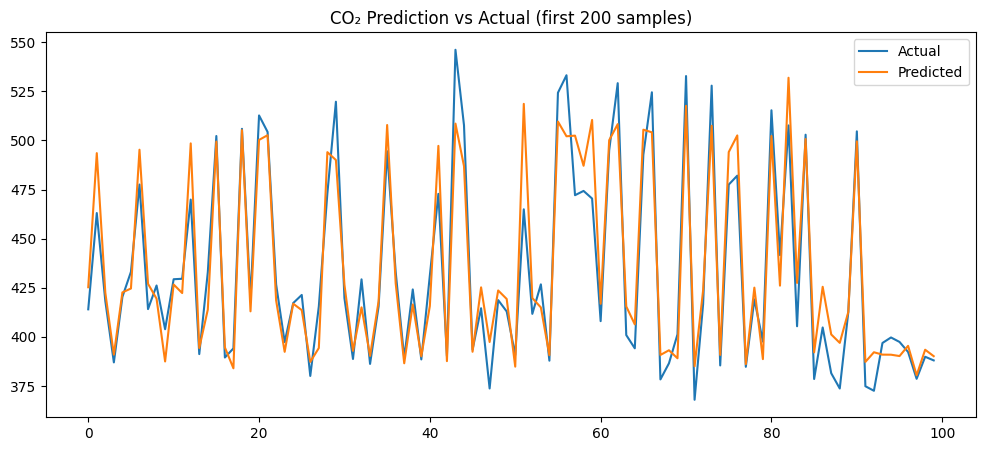

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(preds[:200], label="Predicted")
plt.title("CO₂ Prediction vs Actual (first 200 samples)")
plt.legend()
plt.show()